
**Important Modules for Data Analysis**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.6 MB/s eta 0:00:00


**1. DATA ACQUISTION**

In [ ]:
df = pd.read_csv('/content/heart.csv')

1.1 Scanning the Data Frame

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trtbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalachh,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exng,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [ ]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [ ]:
df.head

<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  caa  output
0     63    1   3     145   233    1        0       150     0    0       1
1     37    1   2     130   250    0        1       187     0    0       1
2     41    0   1     130   204    0        0       172     0    0       1
3     56    1   1     120   236    0        1       178     0    0       1
4     57    0   0     120   354    0        1       163     1    0       1
..   ...  ...  ..     ...   ...  ...      ...       ...   ...  ...     ...
298   57    0   0     140   241    0        1       123     1    0       0
299   45    1   3     110   264    0        1       132     0    0       0
300   68    1   0     144   193    1        1       141     0    2       0
301   57    1   0     130   131    0        1       115     1    1       0
302   57    0   1     130   236    0        0       174     0    1       0

[303 rows x 11 columns]>

**Data Analysis**

**Understanding our DataSet**:
Age : Age of the patient
Sex : Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type

Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df.shape

(303, 11)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.276,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.118,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.181,0.434
trtbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.101,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.071,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.138,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.072,0.137
thalachh,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.213,0.422
exng,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.116,-0.437
caa,0.276,0.118,-0.181,0.101,0.071,0.138,-0.072,-0.213,0.116,1.000,-0.392


In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.276,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.118,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.181,0.434
trtbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.101,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.071,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.138,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.072,0.137
thalachh,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.213,0.422
exng,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.116,-0.437
caa,0.276,0.118,-0.181,0.101,0.071,0.138,-0.072,-0.213,0.116,1.000,-0.392


<Axes: >

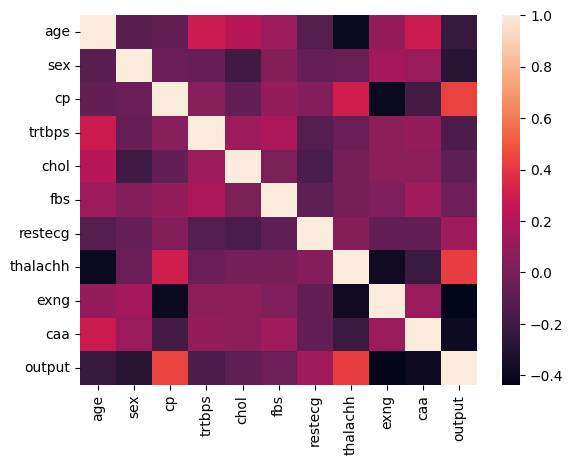

In [ ]:
sns.heatmap(df.corr())

 **we can see our variables are not highly correlated to each other.**


**We will do Uni and Bi variate analysis on our Features**

<Axes: title={'center': 'Age of Patient'}, xlabel='Age', ylabel='Measurement'>

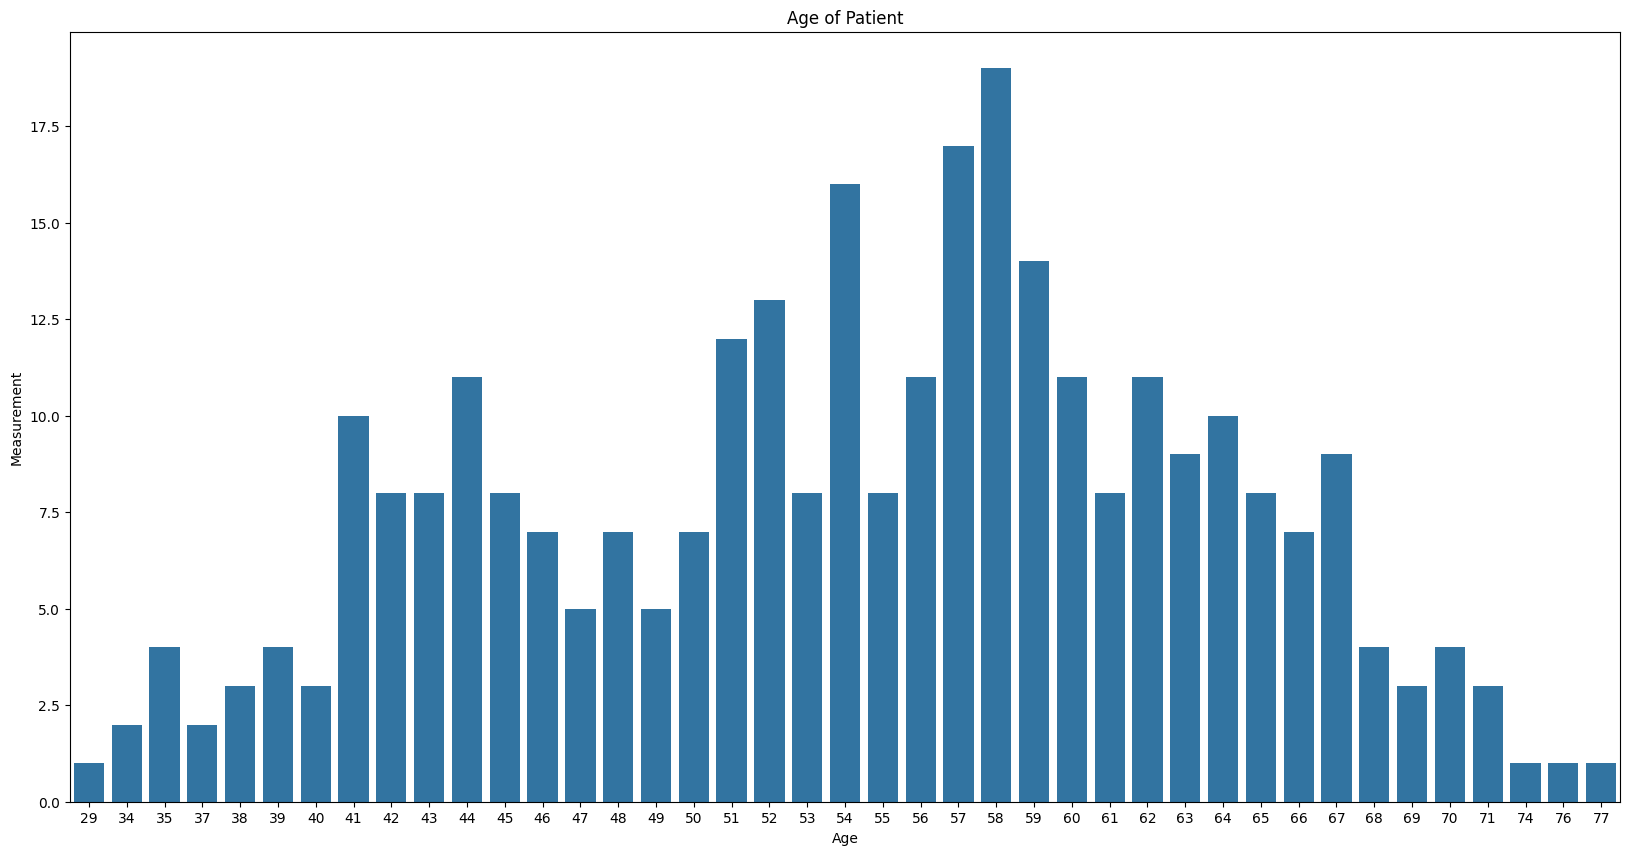

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patient")
plt.xlabel("Age")
plt.ylabel("Measurement")
sns.countplot(x='age', data=df)

<Axes: title={'center': 'Sex of patient, 0= Female nad 1= male'}, xlabel='sex', ylabel='count'>

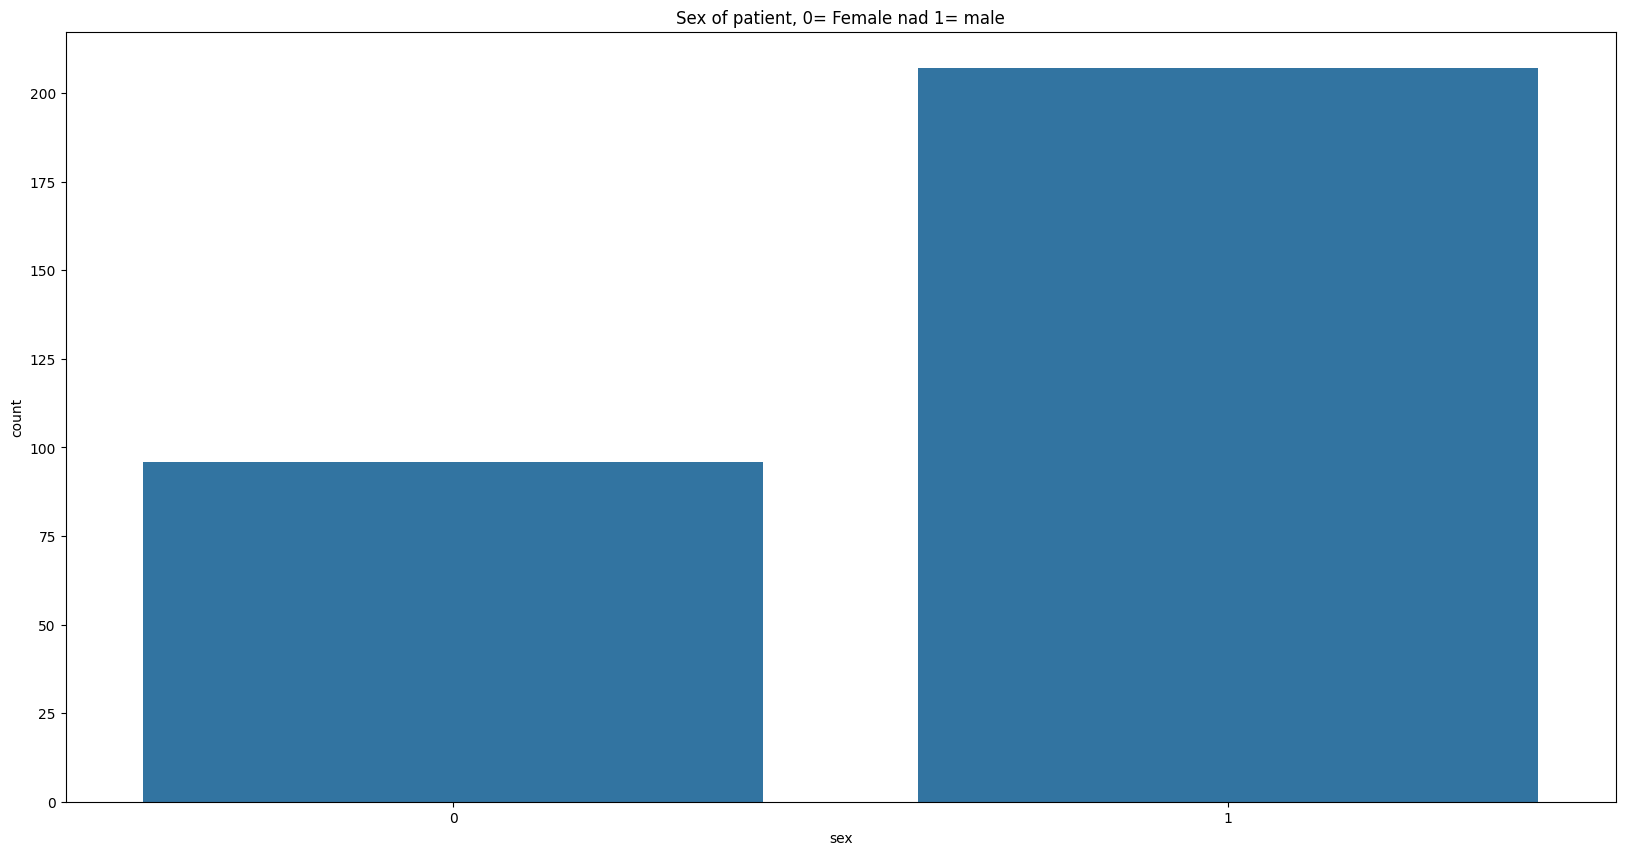

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Sex of patient, 0= Female nad 1= male")
sns.countplot(x='sex', data=df)


In [ ]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][0]= 'asymptomatic'
cp_data['index'][1]= 'non-anginal'
cp_data['index'][2]= 'Atyppical Anigma'
cp_data['index'][3]= 'Typical Anigma'
cp_data

,index,cp
0,asymptomatic,143
1,non-anginal,87
2,Atyppical Anigma,50
3,Typical Anigma,23


<Axes: title={'center': 'Chest Pain of patient'}, xlabel='index', ylabel='cp'>

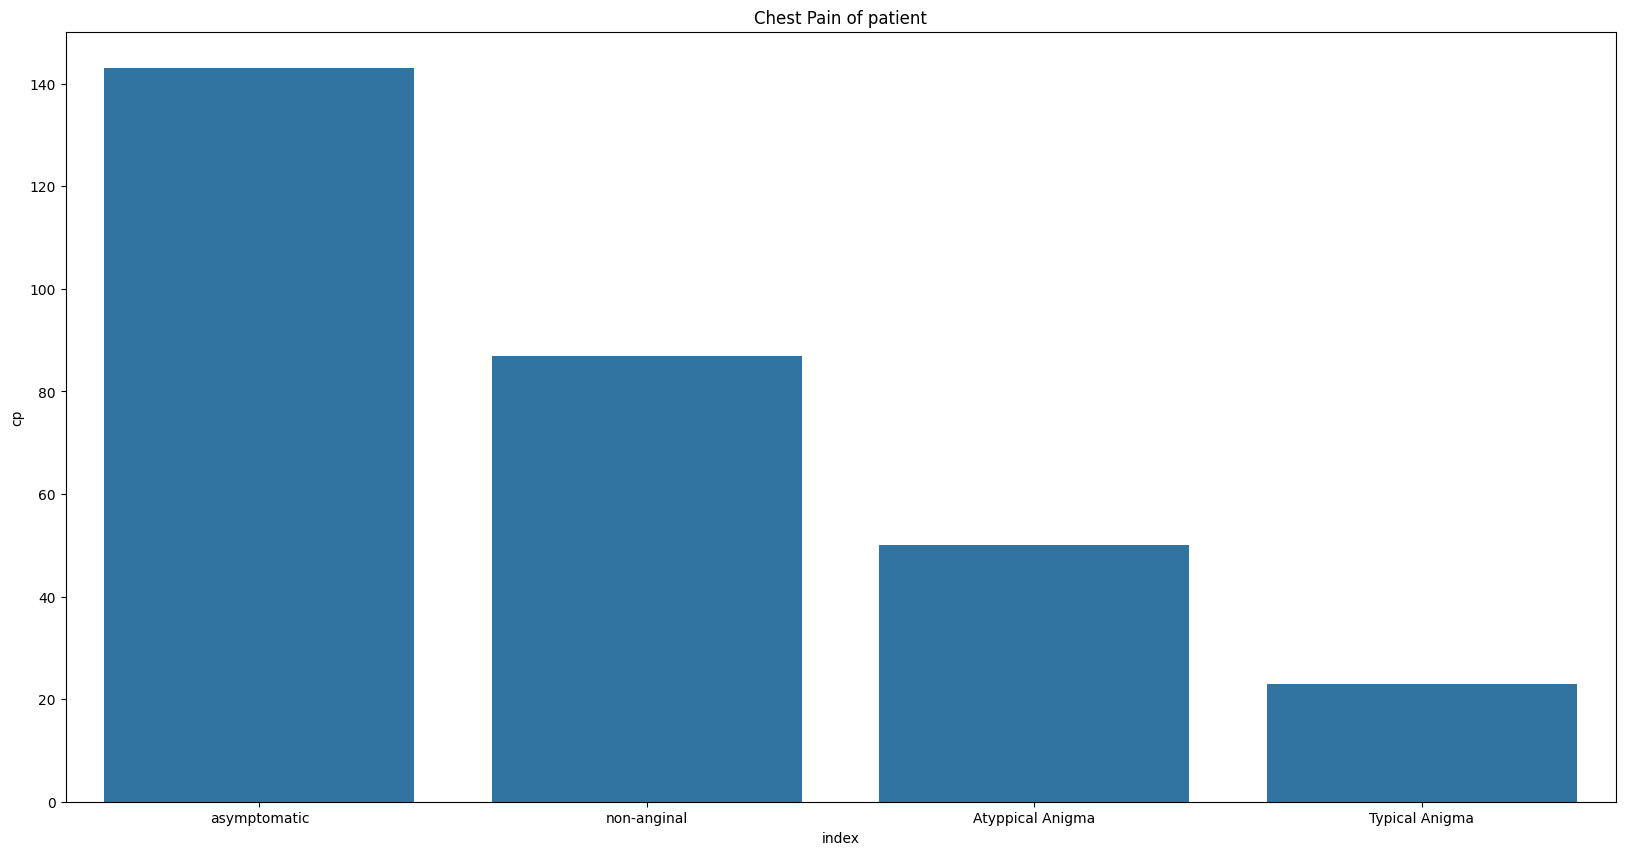

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain of patient")
sns.barplot(x=cp_data['index'], y=cp_data['cp'])

**We have seen how the chest pain category is distributed.**

In [ ]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

,index,restecg
0,normal,152
1,having ST-T wave abnormality,147
2,showing probable or definite left ventricular ...,4


<Axes: title={'center': 'ECG data of Patients'}, xlabel='index', ylabel='restecg'>

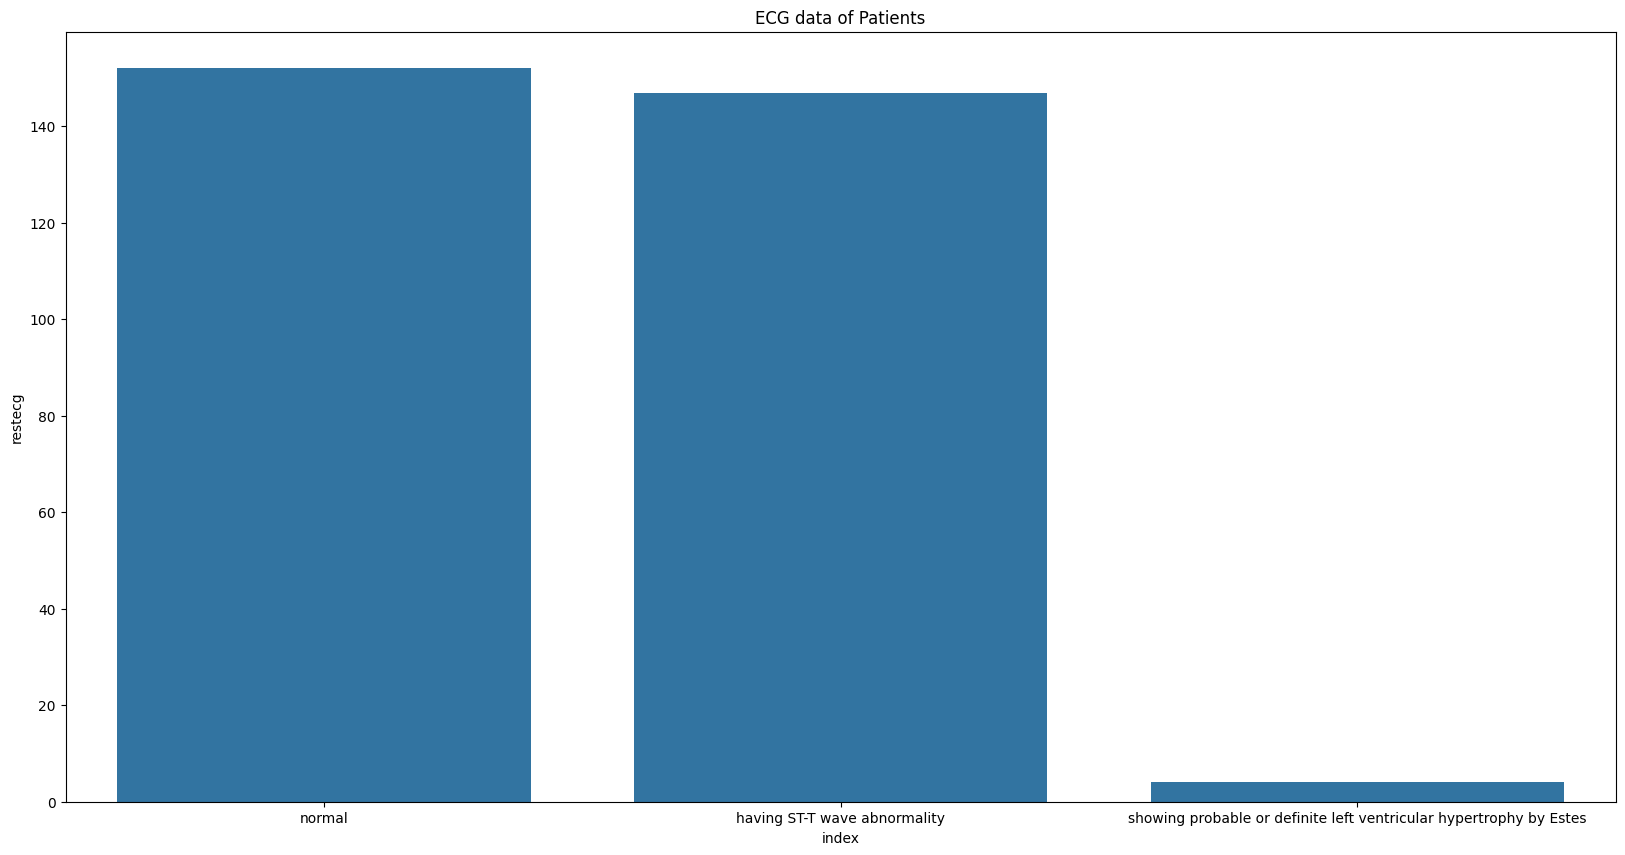

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg'])

**This is Our ECG data**

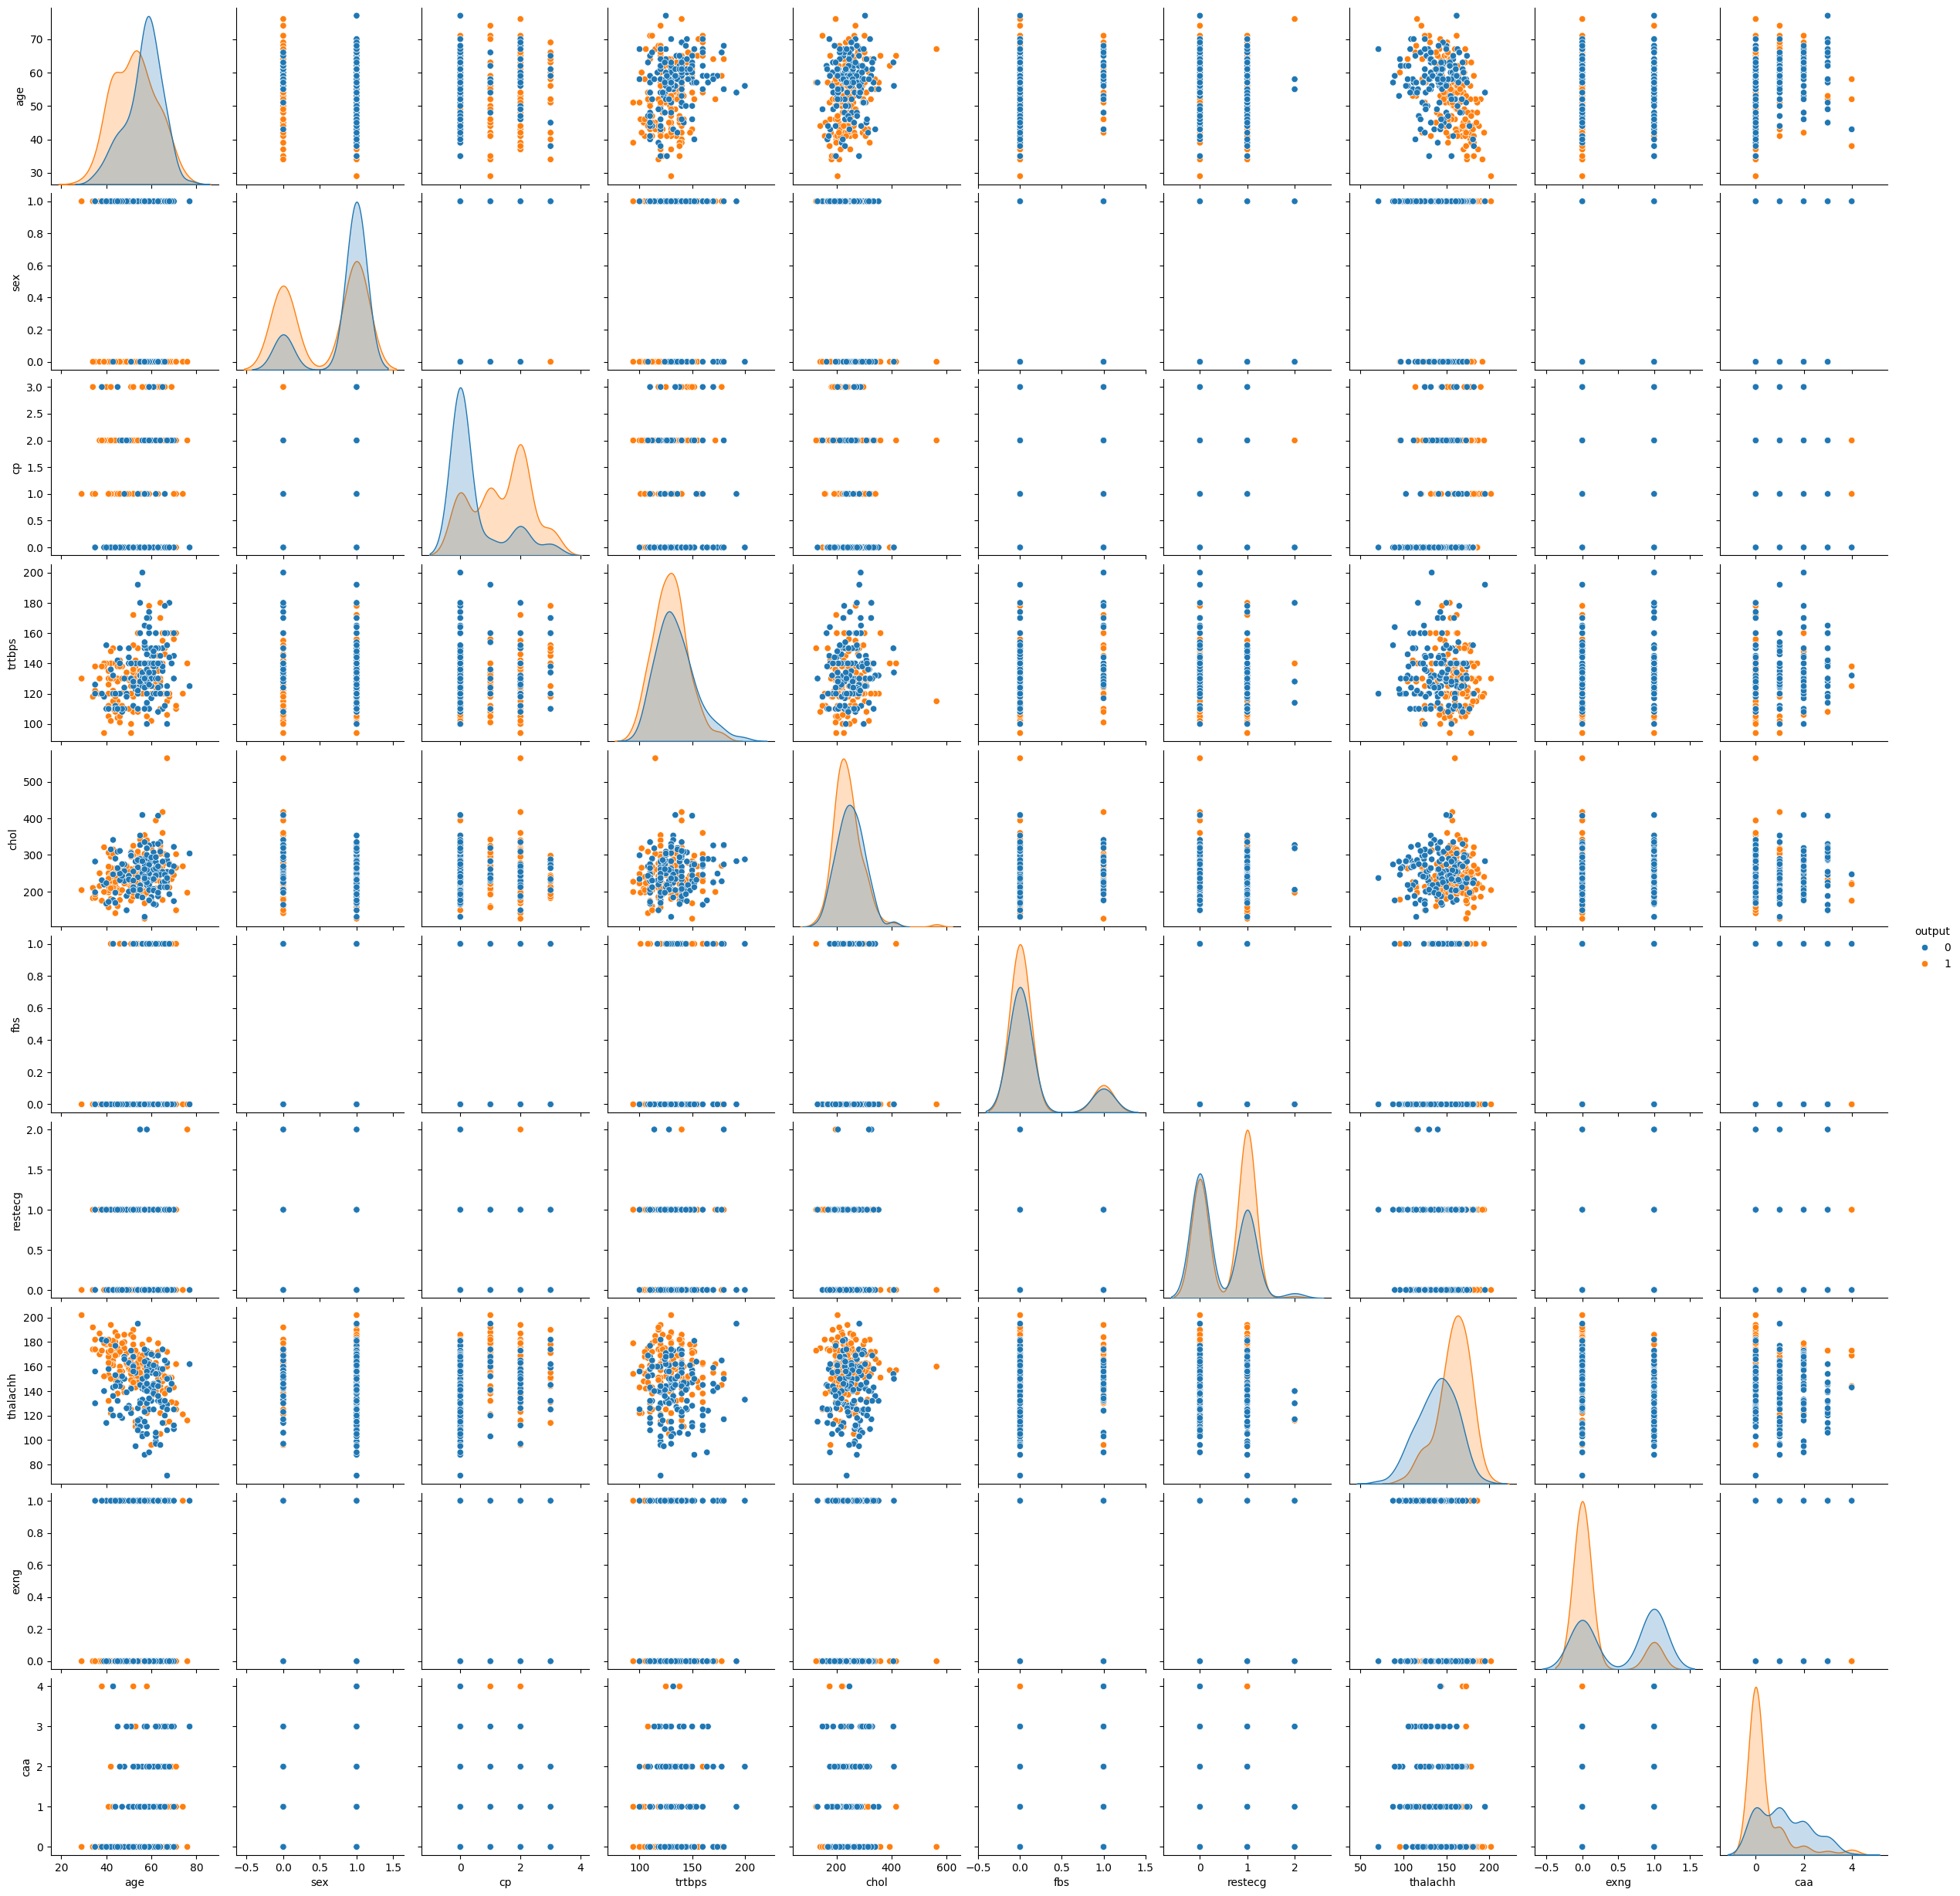

In [ ]:
sns.pairplot(hue='output',data = df)

**Let us see for our Continuous Variable**

Text(0.5, 0, 'Cholestrol')

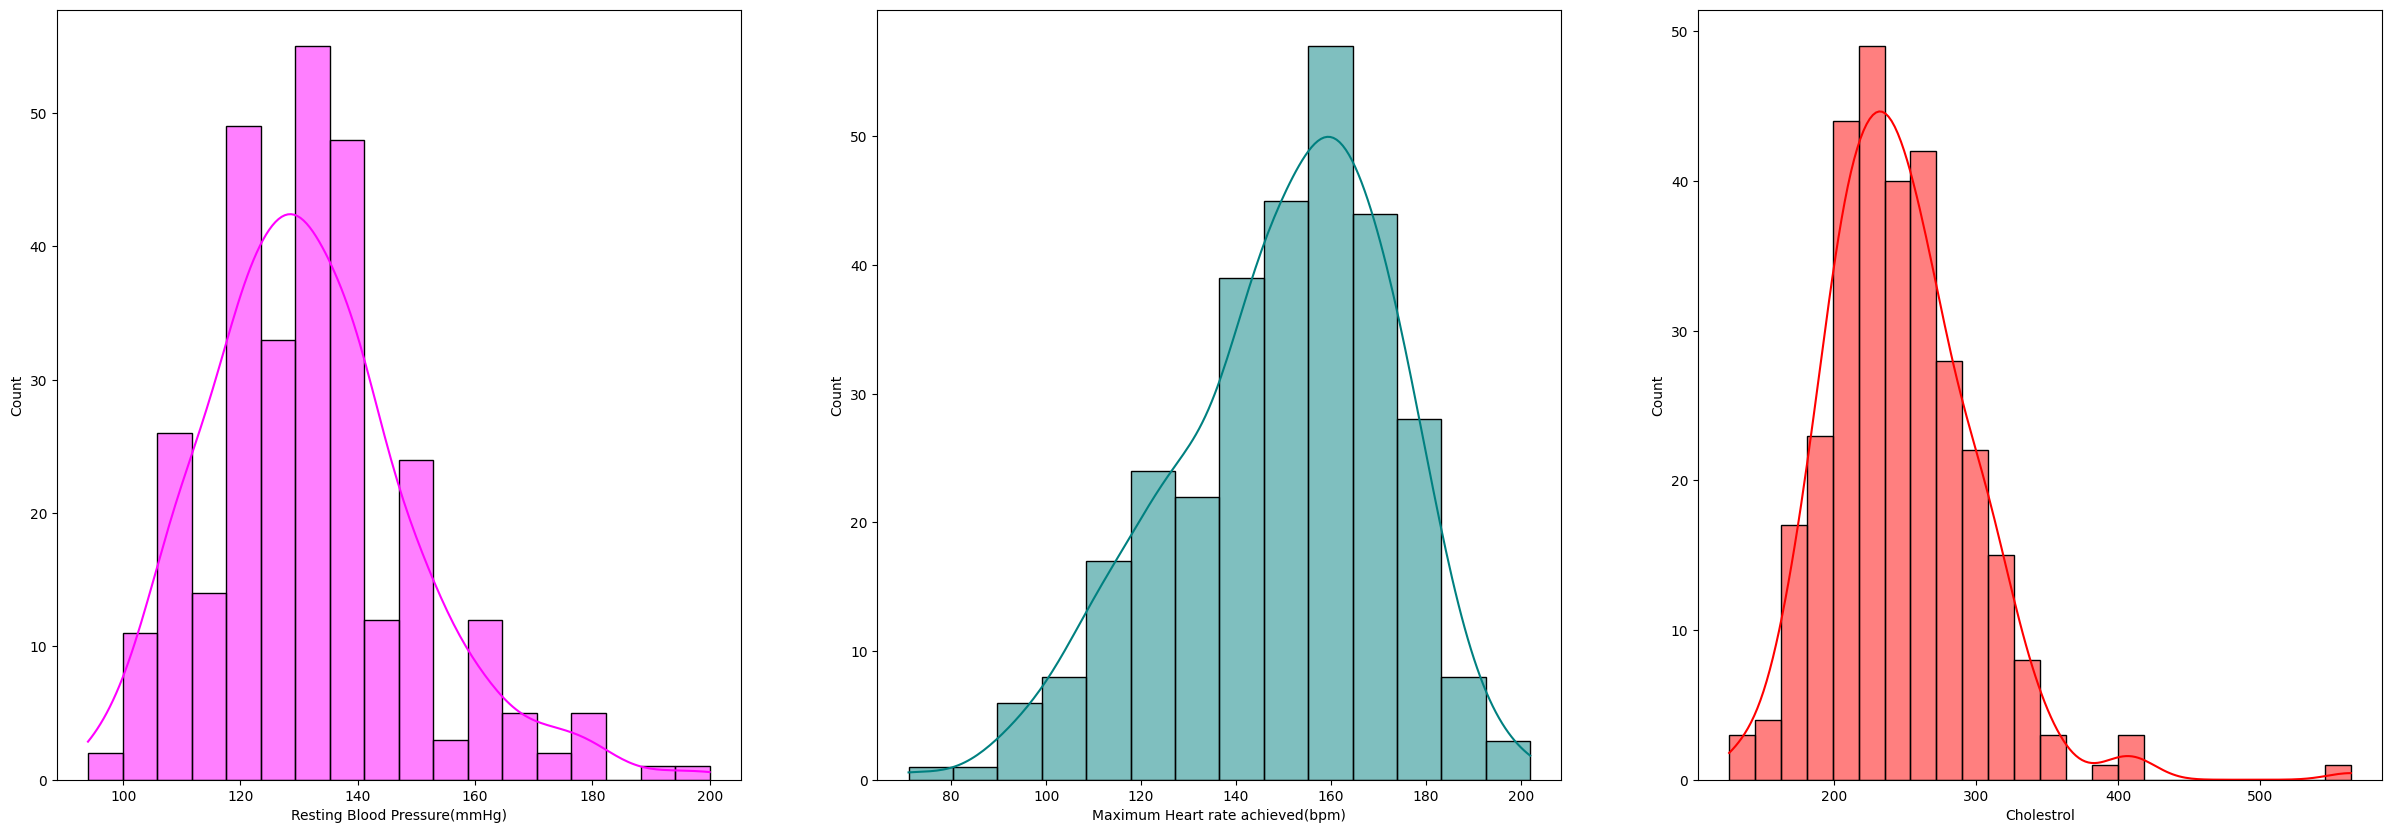

In [ ]:
plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
sns.histplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure(mmHg)")
plt.subplot(1,3,2)
sns.histplot(df['thalachh'], kde=True, color='Teal')
plt.xlabel("Maximum Heart rate achieved(bpm)")
plt.subplot(1,3,3)
sns.histplot(df['chol'], kde=True, color= 'red')
plt.xlabel("Cholestrol")

We have done the Analysis of the data now let's have a look at out data

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


**Lets do Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_df = scaler.fit_transform(df)

In [ ]:
scaled_df

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.69663055,
        -0.71442887,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.69663055,
        -0.71442887,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.69663055,
        -0.71442887,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.69663055,
         1.24459328, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  1.43548113,
         0.26508221, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.69663055,
         0.26508221, -1.09345881]])

In [ ]:
scaled_df.shape

(303, 11)

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


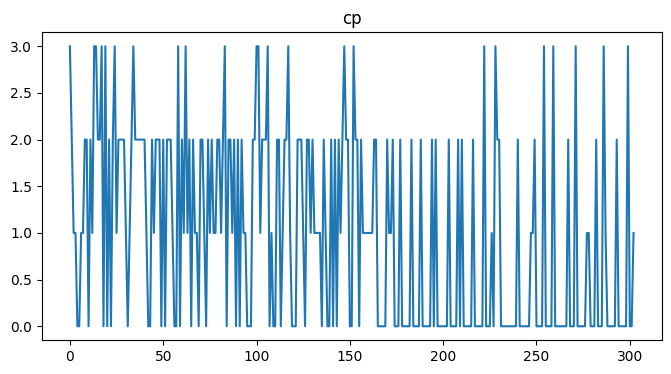

In [ ]:
df['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(True)

In [ ]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


# **We can insert this data into our ML Models**
**We will use the following models for our predictions :**

1.Logistic Regression

2.Decision Tree

3.Random Forest

4.K Nearest Neighbour

5.SVM

Then we will use the ensembling techniques

Let us split our data

In [ ]:
x= df.iloc[:, :-1]

In [ ]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,63,1,3,145,233,1,0,150,0,0
1,37,1,2,130,250,0,1,187,0,0
2,41,0,1,130,204,0,0,172,0,0
3,56,1,1,120,236,0,1,178,0,0
4,57,0,0,120,354,0,1,163,1,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,2
301,57,1,0,130,131,0,1,115,1,1


In [ ]:
y= df.iloc[:, -1:]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbl=LabelEncoder()

In [ ]:
encoded_y= lbl.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
logreg= LogisticRegression()


In [ ]:
logreg.fit(x_train, encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred1 = logreg.predict(x_test)

In [ ]:
Y_pred1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr_conf_matrix = confusion_matrix(encoded_ytest, Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [ ]:
lr_conf_matrix

array([[35,  9],
       [ 5, 42]])

In [ ]:
print(lr_acc_score*100, "%")

84.61538461538461 %


**As we see the Logistic Regression Model have a 85% accuracy**

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [ ]:
ypred2=tree.predict(x_test)

In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [ ]:
tree_conf_matrix

array([[26, 18],
       [10, 37]])

In [ ]:
print(tree_acc_score*100,"%")

69.23076923076923 %


As we see our Decision Tree Model does not perform well as it gives a score of only 69%

# **Random Tree**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!python -m pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(x_train,encoded_y)

RandomForestClassifier()

In [ ]:
ypred3 = rf.predict(x_test)

In [ ]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [ ]:
rf_conf_matrix

array([[32,  7],
       [12, 40]])

In [ ]:
rf_acc_score

0.7912087912087912

In [ ]:
print(rf_acc_score*100, "%")

79.12087912087912 %


# **K Nearest Neighbour**
We have to select what k we will use for the maximum accuracy.

Let's write a function for it

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate= []
for i in range(1, 40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, encoded_y)
  pred= knn.predict(x_test)
  error_rate.append(np.mean(pred != encoded_ytest))

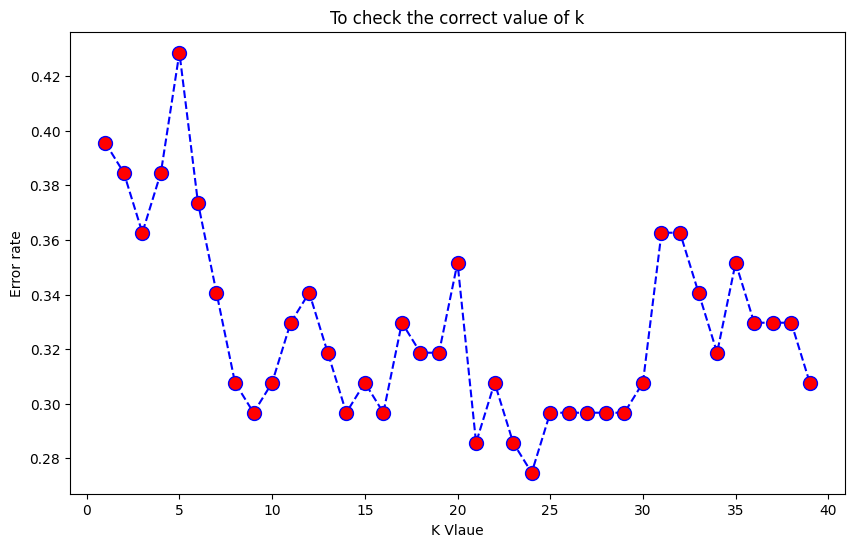

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

In [ ]:
!pip install flask